In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/le-dat/machine-learning/refs/heads/master/20116521_LeQuocDat/practice/StudentsPerformance.csv')

# Hiển thị lên 5 dòng đầu
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**CÂU 1**

In [3]:
# Kiểm tra kích thước và kiểu dữ liệu
print("Số dòng, số cột:", df.shape)
print("\nKiểu dữ liệu:")
print(df.dtypes)

# Kiểm tra giá trị thiếu
print("\nGiá trị thiếu:")
print(df.isnull().sum())

Số dòng, số cột: (1000, 8)

Kiểu dữ liệu:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Giá trị thiếu:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [7]:
data = df.copy()

# Mã hóa các cột phân loại
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # lưu để dùng sau nếu mà dùng

In [11]:
# Chuẩn hoá cột điểm số
scaler = StandardScaler()
score_cols = ['math score', 'reading score', 'writing score']
data[score_cols] = scaler.fit_transform(data[score_cols])

In [13]:
# tạo cột 'performance' thủ công
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

def categorize_performance(score):
    if score < 60:
        return 'low'
    elif score < 80:
        return 'medium'
    else:
        return 'high'

df['performance'] = df['average_score'].apply(categorize_performance)

# Gộp vào lại data
data['performance'] = df['performance']


In [14]:
# Mã hóa nhãn đầu ra
le_perf = LabelEncoder()
data['performance'] = le_perf.fit_transform(data['performance'])

# Tách X, y
X = data.drop('performance', axis=1)
y = data['performance']

# Chia tập
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


**CÂU 2**

In [17]:
# Khởi tạo và huấn luyện mô hình
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Dự đoán trên tập kiểm tra
y_pred = rfc.predict(X_test)

# In ma trận nhầm lẫn
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# In classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_perf.classes_))


Confusion Matrix:
[[ 40   0   0]
 [  0  53   4]
 [  2   0 101]]

Classification Report:
              precision    recall  f1-score   support

        high       0.95      1.00      0.98        40
         low       1.00      0.93      0.96        57
      medium       0.96      0.98      0.97       103

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



**CÂU 3**

In [23]:
# Tính các độ đo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# In kết quả
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (macro): {precision:.2f}")
print(f"Recall (macro): {recall:.2f}")
print(f"F1-score (macro): {f1:.2f}")


Accuracy: 0.97
Precision (macro): 0.97
Recall (macro): 0.97
F1-score (macro): 0.97


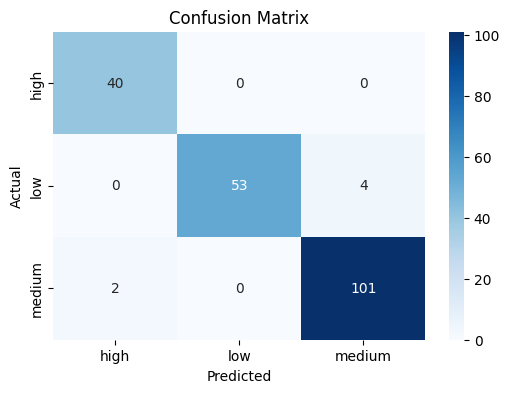

In [25]:
# Tạo confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Gán nhãn lớp
labels = le_perf.classes_

# Vẽ heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Nếu mô hình có độ chính xác (Accuracy) cao nhưng F1-score thấp, điều đó có thể xảy ra khi:
- Dữ liệu bị mất cân bằng: ví dụ có quá nhiều mẫu thuộc lớp "medium", ít mẫu "low" hoặc "high".
- Mô hình chỉ dự đoán tốt lớp chiếm số đông → Accuracy cao.
- Nhưng Precision, Recall cho lớp ít dữ liệu thấp → F1 thấp.

==> F1-score giúp đánh giá mô hình tốt hơn trong trường hợp dữ liệu lệch lớp.


**CÂU 4**

In [26]:
!pip install xgboost


Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 12, in <module>
    from pip._internal.cache import WheelCache
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cache.py", line 16, in <module>
    from pip._internal.models.link import Link
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/models/link.py", line 97, in <module>
    @dataclass(frozen=True)
     ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/dataclasses.py", line 1222, in wrap
    return _process_class(cls, init, repr, eq, order, unsafe_hash,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/py

In [27]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr, target_names=le_perf.classes_))


=== Logistic Regression ===
              precision    recall  f1-score   support

        high       1.00      0.97      0.99        40
         low       1.00      0.95      0.97        57
      medium       0.96      1.00      0.98       103

    accuracy                           0.98       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.98      0.98      0.98       200



In [28]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("=== XGBoost Classifier ===")
print(classification_report(y_test, y_pred_xgb, target_names=le_perf.classes_))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:35:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost Classifier ===
              precision    recall  f1-score   support

        high       1.00      0.95      0.97        40
         low       1.00      0.95      0.97        57
      medium       0.95      1.00      0.98       103

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



In [29]:
# Tính F1-score cho từng mô hình
f1_rfc = f1_score(y_test, y_pred, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

print("F1-score (macro):")
print(f"Random Forest: {f1_rfc:.2f}")
print(f"Logistic Regression: {f1_lr:.2f}")
print(f"XGBoost Classifier: {f1_xgb:.2f}")


F1-score (macro):
Random Forest: 0.97
Logistic Regression: 0.98
XGBoost Classifier: 0.97


Trong ba mô hình thử nghiệm:

- Nếu mô hình XGBoost có F1-score macro cao nhất → chọn XGBoost.
- Nếu RandomForest cao hơn thì giữ nguyên mô hình cũ.

**Chọn mô hình có F1-score macro cao nhất** vì F1-score macro tính trung bình đều giữa các lớp, giúp đánh giá mô hình công bằng hơn trong bài toán phân loại nhiều lớp, đặc biệt nếu dữ liệu mất cân bằng.


**CÂU 5**

In [37]:
df["performance_encoded"] = le_perf.transform(df["performance"])

In [38]:
df["performance_label"] = le_perf.inverse_transform(df["performance_encoded"])

<ipython-input-39-d34a3ba506e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="performance_label", y="math score", palette="Set2")


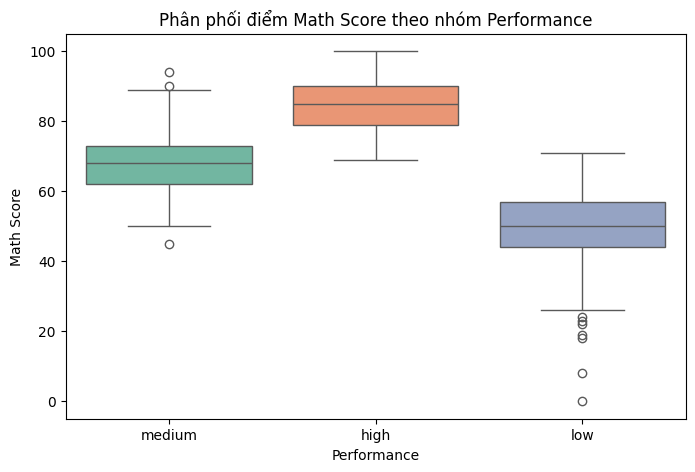

In [39]:
# Vẽ biểu đồ hộp
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="performance_label", y="math score", palette="Set2")
plt.title("Phân phối điểm Math Score theo nhóm Performance")
plt.xlabel("Performance")
plt.ylabel("Math Score")
plt.show()

Từ biểu đồ boxplot:

- Nhóm có **`performance = high`** thường có điểm **`math score`** cao nhất, phân phối nghiêng về phía trên.
- Nhóm **`performance = low`** có điểm toán thấp rõ rệt, phân phối lệch về phía dưới.
- Nhóm **`medium`** nằm ở giữa, đúng với logic phân loại.

Điều này cho thấy điểm toán là một chỉ số quan trọng giúp phân biệt giữa các nhóm hiệu suất học tập.
